Mapping Sentinel-1 backscatter (VV and VH) over Kingman Farm.  

This notebook visualizes Sentinel-1 GeoTIFF images (VV/VH polarization)
over the Kingman Farm boundary using rasterio and geopandas.

**You will need to install geopandas and rasterio  
write the below sentence in your Anaconda Prompt  
conda install geopandas rasterio matplotlib numpy -c conda-forge


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from pathlib import Path

In [5]:
base_dir = Path(".")
vv_dir = base_dir / "VV"        # VV GeoTIFF 
vh_dir = base_dir / "VH"        # VH GeoTIFF 
boundary_file = base_dir / "Kingman_Farm_boundary" / "Kingman_Farm_boundary"/ "Kingman_Farm_boundary.shp"

In [6]:
boundary = gpd.read_file(boundary_file).to_crs(epsg=32619)
boundary_style = dict(edgecolor='black', facecolor='none', linewidth=1.2, zorder=5)

In [7]:
# Select polarization (VH)

polarization = "VH" # 
data_dir = vh_dir if polarization == "VH" else vv_dir

# Load file
files = sorted(list(data_dir.glob("*.tif"))) #list of GeoTIFF files
files = sorted(data_dir.glob("*.tif"))
if not files:
    raise FileNotFoundError(f"No .tif files ")
print(f"{len(files)} {polarization} images")

36 VH images


In [23]:
# Select polarization (VV)

polarization2 = "VV" # 
data_dir = vv_dir if polarization2 == "VV" else vh_dir

# Load file
files2 = sorted(list(data_dir.glob("*.tif"))) #list of GeoTIFF files
files2 = sorted(data_dir.glob("*.tif"))
if not files2:
    raise FileNotFoundError(f"No .tif files ")
print(f"{len(files2)} {polarization2} images")

36 VV images


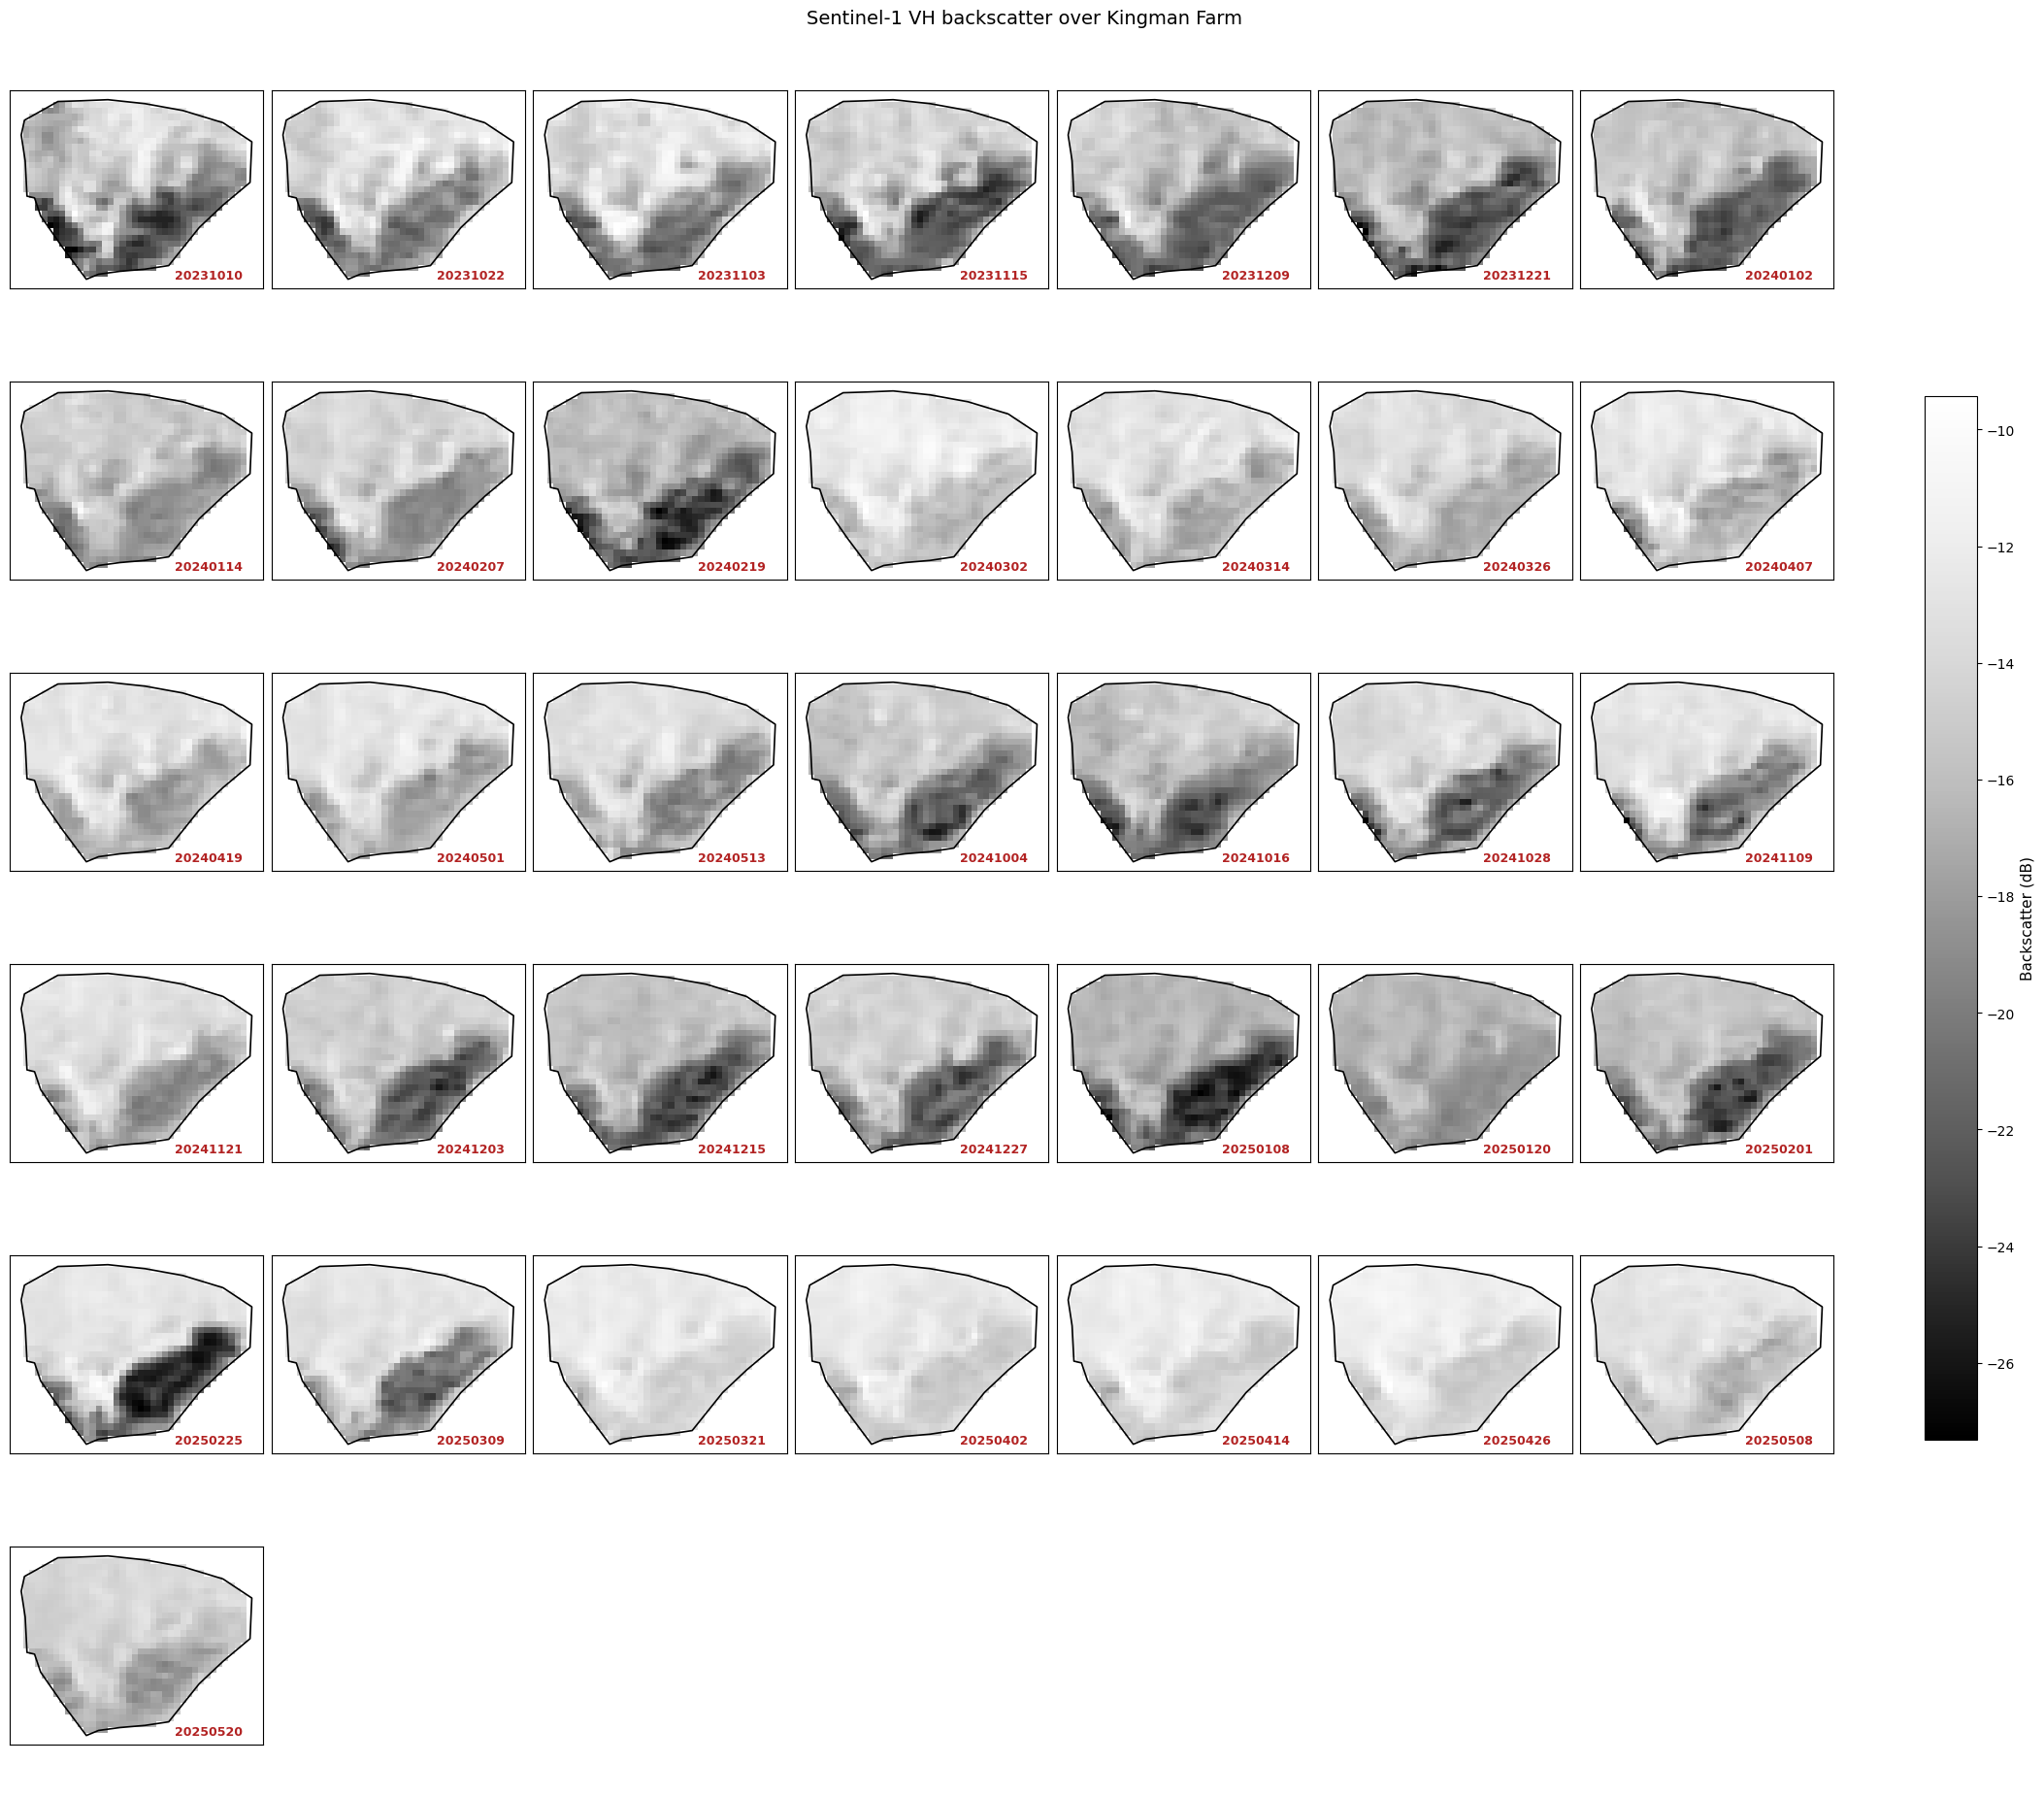

In [8]:
# Mapping sentinel-1 

n = len(files)
cols = 7
rows = int(np.ceil(n / cols))
figsize_per_tile = 3.0
fig_all, axes = plt.subplots(rows, cols,
                             figsize=(cols * figsize_per_tile, rows * figsize_per_tile),
                             constrained_layout=True)
axes = axes.flatten()

#initialize value to keep the minimum and maximum values across all images.
#Since dB values include negative numbers, set +/- infinite.
vmin, vmax = np.inf, -np.inf 

for i, f in enumerate(files): # give both the index (i) and the file path (f)
    with rasterio.open(f) as src: #open GeoTIFF using the rasterio library and automatically closes the file after reading
        sar = src.read(1).astype(float) # read 1st band and converts it to float (floats are needed for log10)
        sar[sar <= 0] = np.nan # 'sar' contains backscatter values
        sar_dB = 10 * np.log10(sar) # convert unit (desibel)
        extent = [ # defines the geographic information of the image (map coordinates).
            src.transform[2], #left (x_min)
            src.transform[2] + src.transform[0] * src.width, # move width * pixel size step to right (x_max) 
            src.transform[5] + src.transform[4] * src.height, # move height * pixel size step to bottom down (y_min)
            src.transform[5],# top (y_max)
        ]
    vmin = min(vmin, np.nanmin(sar_dB))
    vmax = max(vmax, np.nanmax(sar_dB))
    ax = axes[i]
    im = ax.imshow(sar_dB, extent=extent, origin="upper", cmap="Greys_r", vmin=vmin, vmax=vmax)
    boundary.plot(ax=ax, **boundary_style)

    date_str = f.stem.split("_")[2][:8] if len(f.stem.split("_")) > 2 else f.stem
    ax.text(0.65, 0.05, date_str, color="firebrick", fontsize=9, fontweight="bold", transform=ax.transAxes)
    ax.set_xticks([]); ax.set_yticks([])

# Turn off empty axes
for ax in axes[len(files):]:
    ax.axis("off")

# colorbar
cbar = fig_all.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Backscatter (dB)", fontsize=11)

plt.suptitle(f"Sentinel-1 {polarization} backscatter over Kingman Farm", fontsize=14, y=1.02)
plt.show()

The dark areas correspond to the open fields (OP) at Kingman Farm, where the surface is relatively smooth and lots solar radiation, resulting in low backscatter in VH polarizations. The areas that shows bright in VH mostly correspond to forested or sheltered regions (SF) with denser vegetation and surrouned taller trees, leading to less solar radiation. In this location, radar waves interact more with branches and leaves, bouncing in different directions (increase scattering). This causes stronger VH signals because the cross-polarized (VH) backscatter increases when the waves are scattered.

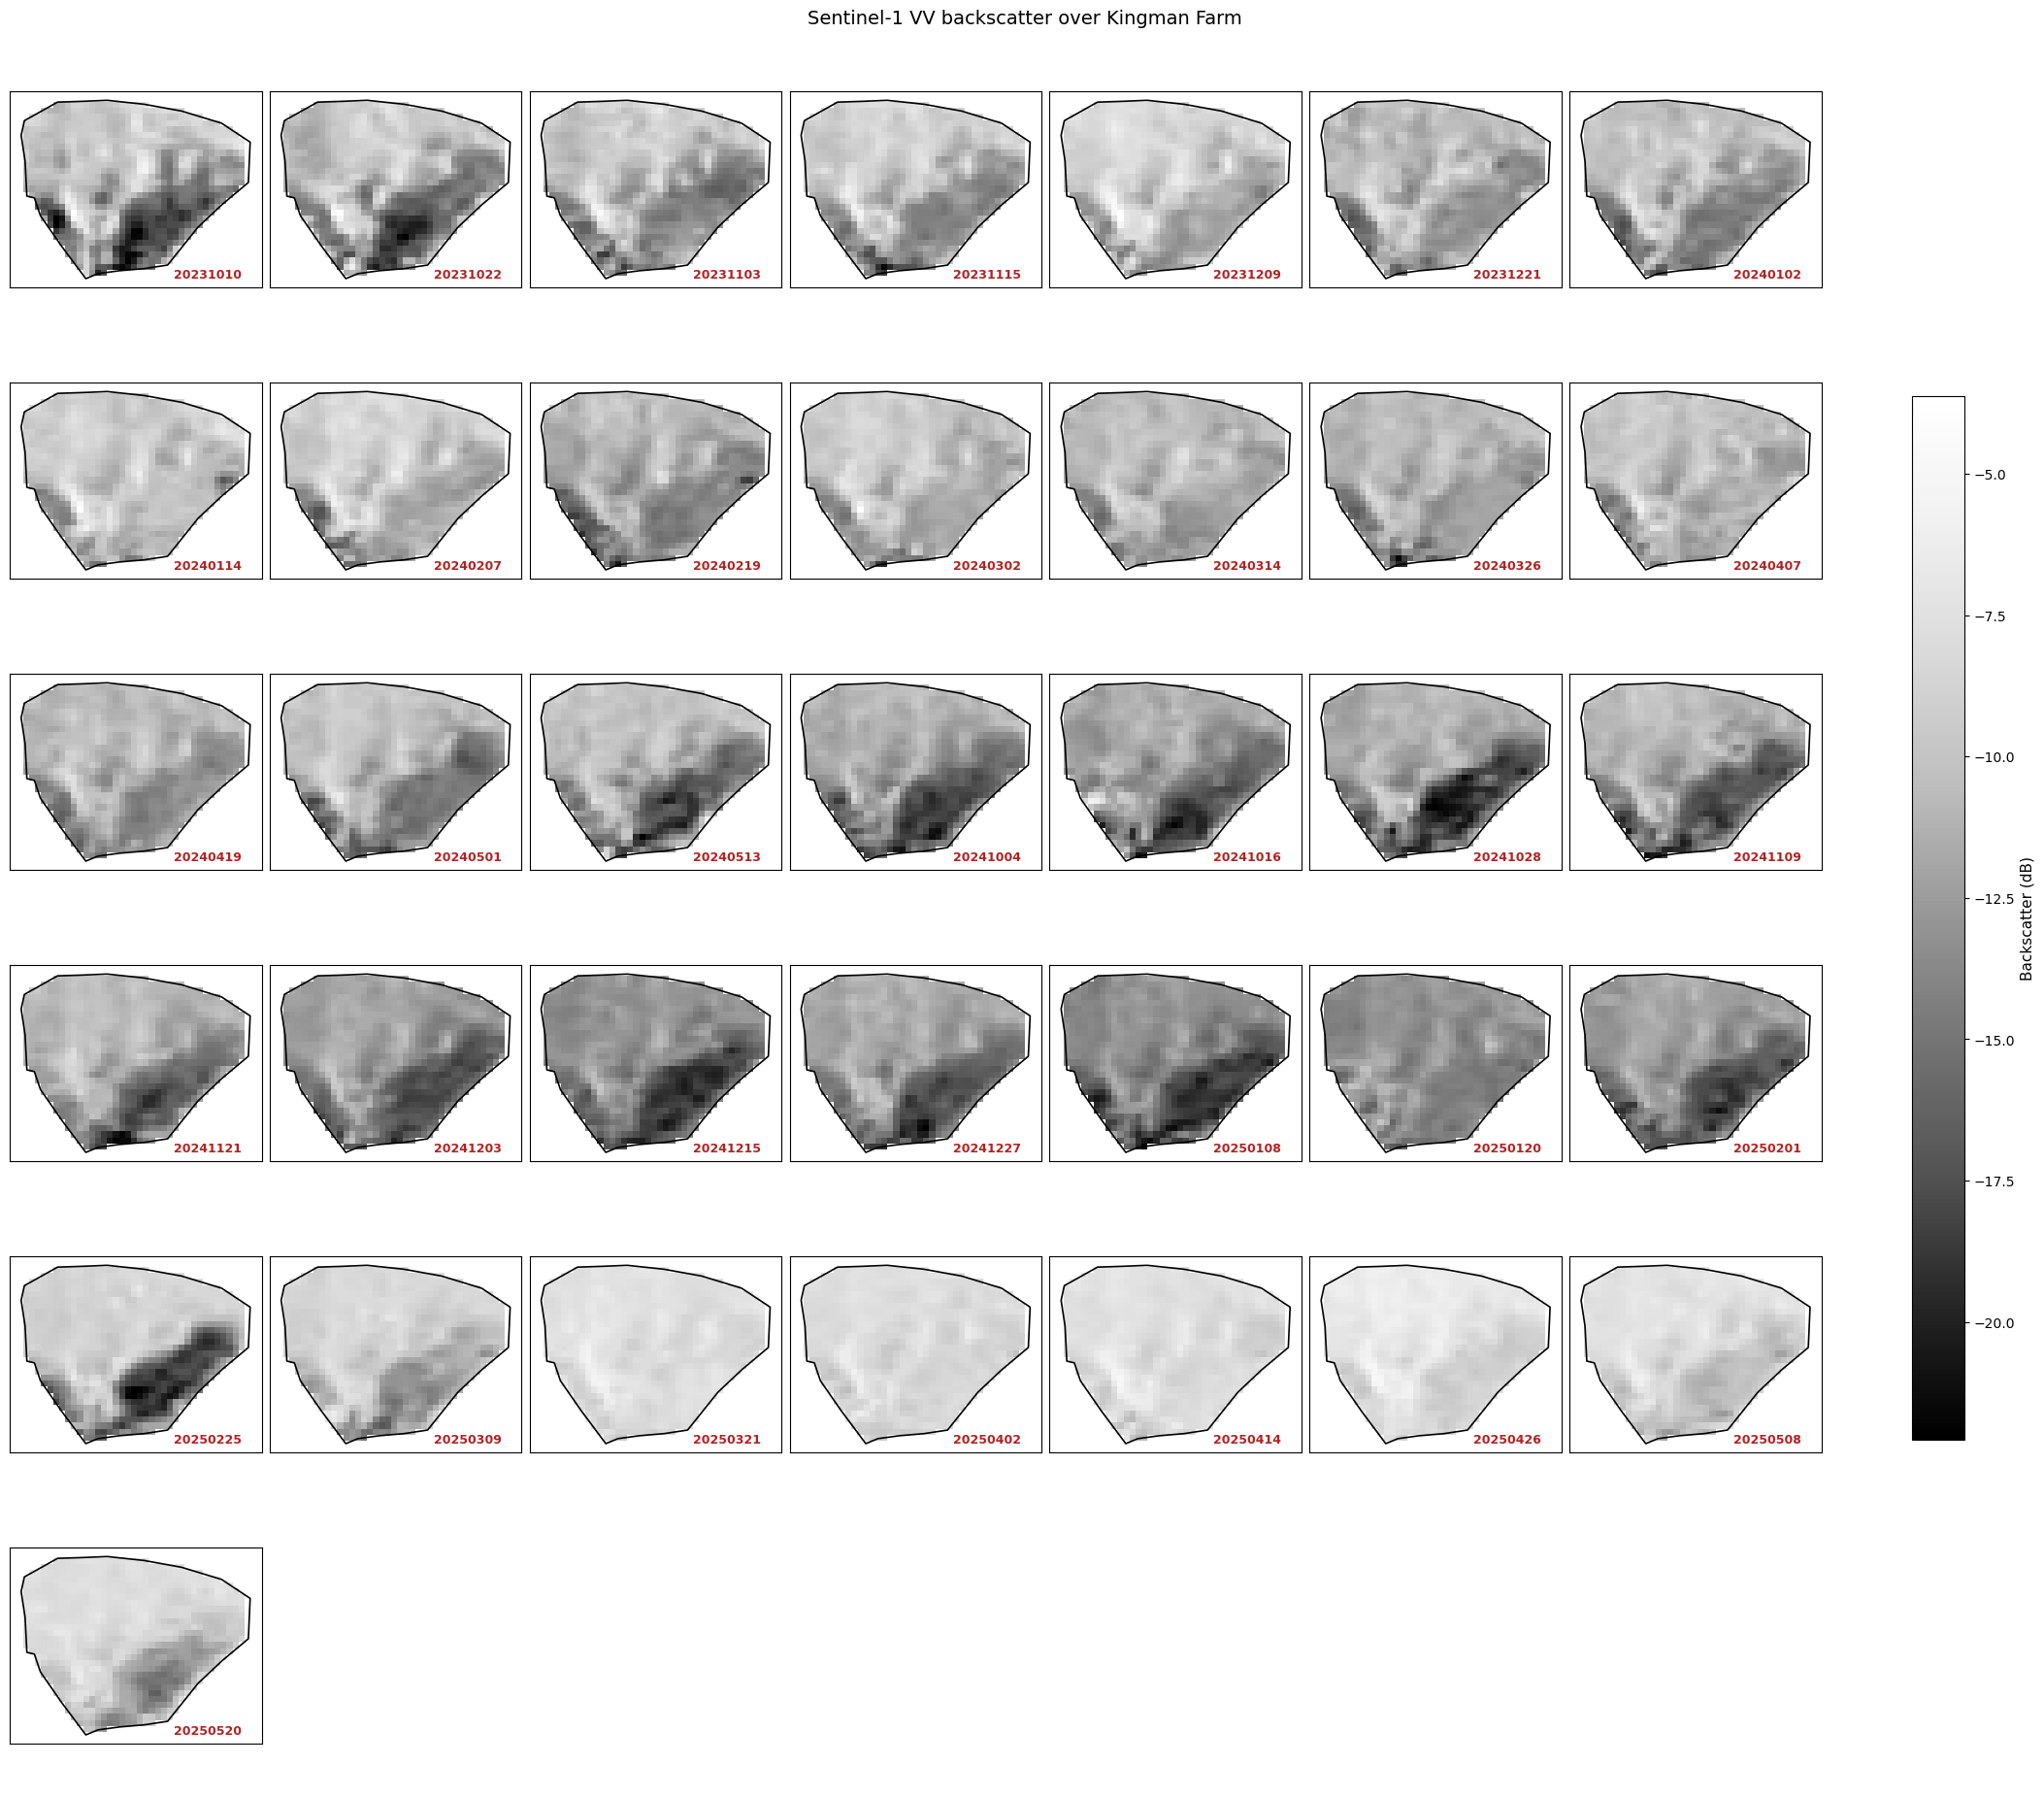

In [25]:
n = len(files2)
cols = 7
rows = int(np.ceil(n / cols))
figsize_per_tile = 3.0
fig_all, axes = plt.subplots(rows, cols,
                             figsize=(cols * figsize_per_tile, rows * figsize_per_tile),
                             constrained_layout=True)
axes = axes.flatten()

#initialize value to keep the minimum and maximum values across all images.
#Since dB values include negative numbers, set +/- infinite.
vmin, vmax = np.inf, -np.inf 

for i, f in enumerate(files2): # give both the index (i) and the file path (f)
    with rasterio.open(f) as src: #open GeoTIFF using the rasterio library and automatically closes the file after reading
        sar2 = src.read(1).astype(float) # read 1st band and converts it to float (floats are needed for log10)
        sar2[sar2 <= 0] = np.nan # 'sar' contains backscatter values
        sar_dB2 = 10 * np.log10(sar2) # convert unit (desibel)
        extent = [ # defines the geographic information of the image (map coordinates).
            src.transform[2], #left (x_min)
            src.transform[2] + src.transform[0] * src.width, # move width * pixel size step to right (x_max) 
            src.transform[5] + src.transform[4] * src.height, # move height * pixel size step to bottom down (y_min)
            src.transform[5],# top (y_max)
        ]
    vmin = min(vmin, np.nanmin(sar_dB2))
    vmax = max(vmax, np.nanmax(sar_dB2))
    ax = axes[i]
    im = ax.imshow(sar_dB2, extent=extent, origin="upper", cmap="Greys_r", vmin=vmin, vmax=vmax)
    boundary.plot(ax=ax, **boundary_style)

    date_str = f.stem.split("_")[2][:8] if len(f.stem.split("_")) > 2 else f.stem
    ax.text(0.65, 0.05, date_str, color="firebrick", fontsize=9, fontweight="bold", transform=ax.transAxes)
    ax.set_xticks([]); ax.set_yticks([])

# Turn off empty axes
for ax in axes[len(files2):]:
    ax.axis("off")

# colorbar
cbar = fig_all.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Backscatter (dB)", fontsize=11)

plt.suptitle(f"Sentinel-1 {polarization2} backscatter over Kingman Farm", fontsize=14, y=1.02)
plt.show()

--------------------------------------
supplementary explain code  
mapping information is stored in "src.transform"   

transform[0]:pixel size  
transform[2]: X coordinate (upper-left)  
transform[5]: Y coordinate (upper-left corner)



In [19]:
src.transform

Affine(30.0, 0.0, 342750.0,
       0.0, -30.0, 4782240.0)

In [20]:
src.width

37

In [21]:
src.height

29